<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-RobVegaTec/blob/main/Actividad_Semanal_6_visualizaci%C3%B3n_A01378921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

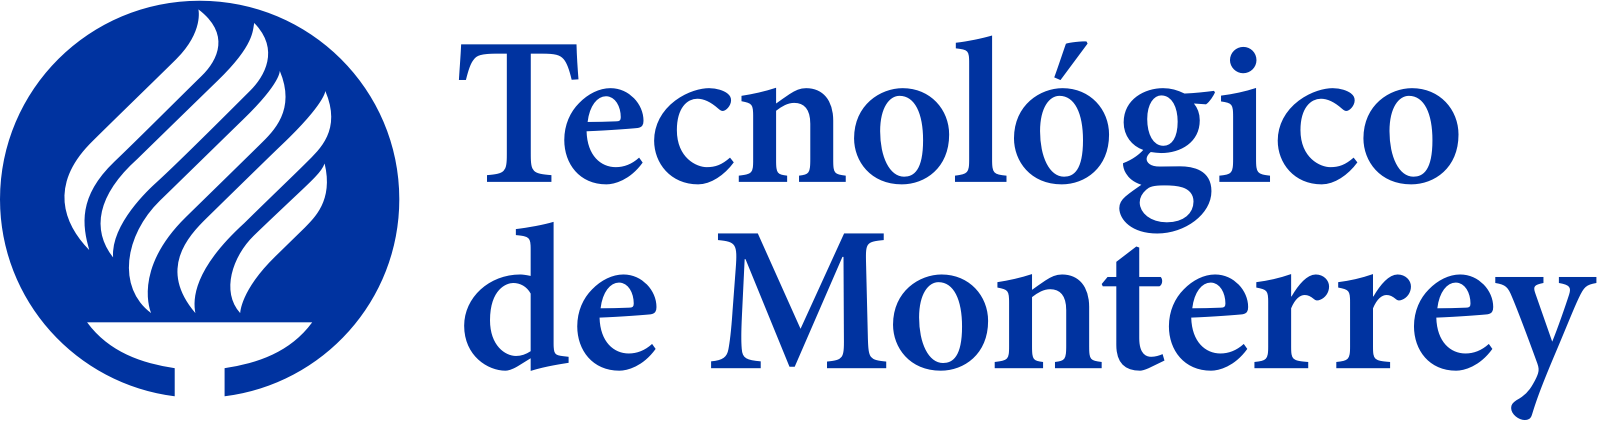

Materia: Ciencia y analítica de datos

Profesora: María de la Paz Rico Fernández

Nombre de la actividad: Actividad Semanal -- 6, visualización

Nombre del alumno: Roberto Vega Alanis

Matrícula: A01378921

Fecha: 29 de Octubre de 2022

Link a repositorios:

GitHub: https://github.com/PosgradoMNA/actividades-de-aprendizaje-RobVegaTec/blob/main/Actividad_Semanal_6_visualizaci%C3%B3n_A01378921.ipynb

Colab:
https://colab.research.google.com/drive/15S5Pc-fnJ6aUe9E0gPuXqN0UCWv7KPuk#scrollTo=PVhxpu7Ui-2a

# Instruccones

1. Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 
2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()
3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna
4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión
5. Realiza el conteo de las variables categóricas
6. Escala los datos, si consideras necesario
7. Reduce las dimensiones con PCA, si consideras necesario.
7.1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
7.2. Indica la importancia de las variables en cada componente
8. Elabora los histogramas de los atributos para visualizar su distribución
9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.
10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

## 1. Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 

Nombre del conjunto de datos:

Dataset paara la predicción de incumplimiento de pago de crédito


Autor del conjunto de datos:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

Descripción de los datos:

Esta investigación empleó una variable binaria, pago por defecto (Sí = 1, No = 0), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes 23 variables como variables explicativas:

X1: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).

X2: Género (1 = masculino; 2 = femenino).

X3: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).

X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).

X5: Edad (año).

X6 - X11: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera: X6 = el estado de pago en septiembre de 2005; X7 = el estado de pago en agosto de 2005; . . .;X11 = estado de amortización en abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.

X12-X17: Importe del estado de cuenta (dólar NT). 

X12 = monto del estado de cuenta en septiembre de 2005; X13 = monto del estado de cuenta en agosto de 2005; . . .; X17 = monto del estado de cuenta en abril de 2005.

X18-X23: Monto del pago anterior (dólar NT). X18 = monto pagado en septiembre de 2005; X19 = monto pagado en agosto de 2005; . . .;X23 = monto pagado en abril de 2005.

In [1]:
# Llammar librería necesarias

# Para manipulación de datos
import pandas as pd
import numpy as np

## Para escalamiento
from sklearn.preprocessing import StandardScaler
## Para aplicación de PCA
from sklearn.decomposition import PCA

##Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Habilitamos la opción de visualizar todas las columnas
pd.set_option('max_columns',None)

In [3]:
# URL de los datos en formato csv
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [4]:
# Obtenemos los datos del url como csv
df = pd.read_csv(path, index_col = 0) # Hacemos la columna ID nuestro índice (es una buena práctica)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


## 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [5]:
# Obtención de las dimensiones del dataset
df.shape

(30000, 24)

In [6]:
# Observamos el nombre de las columnas
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [7]:
# Observamos una muestra de los datos (lso primeros 5 registros)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [8]:
# Analizamos el tipo de dato de las variables (columnas)
df.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [9]:
# Observamos el tip´de dato y la cantidad de datos no nulos que tiene cada campo
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

Observamos que algunos campos continen valores nulos

In [10]:
# Algún valor nulo (por lo menos una celda vacía)
print(df.isna().values.any())
# Columnas con valores nulos
print(df.isna().any())

True
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool


El uso de la función isna() confirma lo mostrado por df.info()

In [11]:
# Contamos cuantos regsitrsos son nulos en cada columna

df[df.isnull().any(axis = 1)].count()

X1     42
X2     41
X3     40
X4     40
X5     37
X6     39
X7     37
X8     35
X9     33
X10    26
X11    28
X12    31
X13    31
X14    29
X15    27
X16    25
X17    32
X18    34
X19    33
X20    34
X21    31
X22    31
X23    37
Y      39
dtype: int64

In [12]:
# Observamos los registros con valores nulos
df[df.isna().any(axis = 1)]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
19,360000,2.0,1.0,1.0,49.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,50000,1.0,1.0,2.0,25.0,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0.0,780.0,0.0,0.0,0.0,NaN,780.0,0.0,0.0,0.0,0.0,0.0,1.0
50,20000,1.0,1.0,2.0,24.0,0.0,0.0,0.0,0.0,NaN,0.0,17447.0,18479.0,19476.0,19865.0,20480.0,20063.0,1318.0,1315.0,704.0,928.0,912.0,1069.0,0.0
65,130000,2.0,2.0,1.0,51.0,-1.0,-1.0,-2.0,-2.0,-1.0,-1.0,99.0,0.0,0.0,0.0,2353.0,0.0,0.0,NaN,0.0,2353.0,0.0,0.0,0.0
161,30000,1.0,1.0,2.0,41.0,2.0,2.0,2.0,NaN,2.0,0.0,24357.0,27453.0,26718.0,28168.0,27579.0,28321.0,3500.0,0.0,2200.0,NaN,1200.0,1250.0,0.0
174,50000,2.0,1.0,2.0,24.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-709.0,-709.0,-709.0,-2898.0,-3272.0,-3272.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0
176,130000,1.0,3.0,1.0,56.0,1.0,2.0,2.0,2.0,2.0,3.0,64617.0,65978.0,67282.0,68557.0,NaN,71345.0,3000.0,3000.0,3000.0,5500.0,0.0,0.0,1.0
183,500000,2.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,56422.0,110616.0,110340.0,122967.0,108834.0,70064.0,70010.0,30357.0,30000.0,20000.0,52183.0,20000.0,0.0
220,310000,2.0,1.0,2.0,NaN,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1424.0,4542.0,126.0,0.0,0.0,0.0,4542.0,126.0,0.0,0.0,0.0,0.0,0.0


## 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [13]:
# Para simplificar este paso realizamos algunos passo adicionales

# Renombramos las columnas
df = df.rename(columns = {
    'X1': 'MontoCredito',      'X2': 'Genero', 'X3' : 'NivelEducacion',
    'X4': 'EstadoCivil',       'X5': 'Edad',   'X6' : 'HistorialPagoSep',
    'X7': 'HistorialPagoAgo',  'X8': 'HistorialPagoJul', 'X9' : 'HistorialPagoJun',
    'X10': 'HistorialPagoMay', 'X11': 'HistorialPagoAbr', 'X12' : 'EstadoCuentaSep',
    'X13': 'EstadoCuentaAgo',  'X14': 'EstadoCuentaJul', 'X15' : 'EstadoCuentaJun',
    'X16': 'EstadoCuentaMay',  'X17': 'EstadoCuentaAbr', 'X18' : 'MontoPagoAnteriorSep',
    'X19': 'MontoPagoAnteriorAgo', 'X20': 'MontoPagoAnteriorJul', 
    'X21': 'MontoPagoAnteriorJun', 'X22': 'MontoPagoAnteriorMay', 
    'X23': 'MontoPagoAnteriorAbr'})

In [14]:
# Con base en la metadata, determinamos cuales son variables categóricas con el fin de evitar una imputación incorrecta
columnas_categ = ['Genero','NivelEducacion', 'EstadoCivil']

# no incluímos la columna "ID" ya que no contiene valores nulos y es parte del índice

In [15]:
# Convertimos columnas a categóricas
for col in columnas_categ:
  df[col] = df[col].astype('category')

In [16]:
# Imputamos la media a los valores numéricos (excluimos valores categóricos)
df.fillna(df.mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [17]:
# Observamos los registros con valores nulos
df[df.isna().any(axis = 1)]

,MontoCredito,Genero,NivelEducacion,EstadoCivil,Edad,HistorialPagoSep,HistorialPagoAgo,HistorialPagoJul,HistorialPagoJun,HistorialPagoMay,HistorialPagoAbr,EstadoCuentaSep,EstadoCuentaAgo,EstadoCuentaJul,EstadoCuentaJun,EstadoCuentaMay,EstadoCuentaAbr,MontoPagoAnteriorSep,MontoPagoAnteriorAgo,MontoPagoAnteriorJul,MontoPagoAnteriorJun,MontoPagoAnteriorMay,MontoPagoAnteriorAbr,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
6228,30000,1.0,NaN,NaN,35.484214,-0.016635,-0.133689,-0.166405,-0.2208,-0.266342,-0.291136,51236.86275,49190.734669,47025.350152,43275.652326,40324.49398,21120.000000,1586.000000,1365.000000,1663.0000,5106.000000,1050.000000,0.0,0.0
24366,130000,NaN,NaN,NaN,35.484214,-0.016635,-0.133689,-0.166405,-0.2208,-0.266342,-0.291136,51236.86275,49190.734669,47025.350152,43275.652326,40324.49398,38881.135745,5662.945886,5922.488913,5225.6234,4827.252526,4800.297209,390.0,0.0


In [18]:
# Imputamos la moda a los valores categóricos faltantes (ya que la imputación de la media sería un valor incorrecto para este tipo de datos)
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [19]:
# Comprobamos que ya no tenemos valores nulos
df[df.isna().any(axis = 1)]

,MontoCredito,Genero,NivelEducacion,EstadoCivil,Edad,HistorialPagoSep,HistorialPagoAgo,HistorialPagoJul,HistorialPagoJun,HistorialPagoMay,HistorialPagoAbr,EstadoCuentaSep,EstadoCuentaAgo,EstadoCuentaJul,EstadoCuentaJun,EstadoCuentaMay,EstadoCuentaAbr,MontoPagoAnteriorSep,MontoPagoAnteriorAgo,MontoPagoAnteriorJul,MontoPagoAnteriorJun,MontoPagoAnteriorMay,MontoPagoAnteriorAbr,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,


## 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [20]:
df.describe(include = 'all')

,MontoCredito,Genero,NivelEducacion,EstadoCivil,Edad,HistorialPagoSep,HistorialPagoAgo,HistorialPagoJul,HistorialPagoJun,HistorialPagoMay,HistorialPagoAbr,EstadoCuentaSep,EstadoCuentaAgo,EstadoCuentaJul,EstadoCuentaJun,EstadoCuentaMay,EstadoCuentaAbr,MontoPagoAnteriorSep,MontoPagoAnteriorAgo,MontoPagoAnteriorJul,MontoPagoAnteriorJun,MontoPagoAnteriorMay,MontoPagoAnteriorAbr,Y
count,30000.000000,30000.0,30000.0,30000.0,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,2.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,18113.0,14032.0,15966.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,167484.322667,NaN,NaN,NaN,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,-0.291136,51236.862750,49190.734669,4.702535e+04,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,NaN,NaN,NaN,9.217256,1.123773,1.197154,1.195908,1.168977,1.132994,1.149865,73631.715966,71170.333204,6.934583e+04,64329.411150,60792.752471,59551.384923,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677,0.415034
min,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3566.750000,2986.750000,2.674750e+03,2332.000000,1769.500000,1258.500000,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000,0.000000
50%,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22400.000000,21228.500000,2.010800e+04,19066.000000,18123.000000,17100.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50177.000000,49198.250000,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000,0.000000


Por lo que se puede observar, las medidas de tendencia central y dispersión nos indican que existe una gran variedad de rangos de estas medidas entre las diefrenetes variables. Esto es debido a la diferencia de magnitud inherente a las variables de cada caso. Por otar parte, existen variables que a pesar de expresarse enm las mimas unidades tienen valores medidas muy distintas.

Las variables referentes al mismo tipo de información suelen tener valores con medias y desviaciones semejantes; las medias son de valores del mismo orden, la magnitud de las desviaciones est´nandar, semejantes y mantienen valores muy cercanos en sus percentiles.

Lo anterior nos indca que ecxiste una fuerte variación de magnitudes manejadas entre las variables lo que podría generar una influencia indeseada en el modelo atribuida solo por la magnitud de los datos, lo cual es incorrecto. Es por ello que se ocnsidera necesario un escalamiento de los datos.

## 5. Realiza el conteo de las variables categóricas

In [21]:
# Conteo de los de las categorías de cada variable categórica existente
for cat in columnas_categ:
  print(cat,':')
  print(df[cat].value_counts())
  print('Total de datos:', len(df),'\n')

Genero :
2.0    18113
1.0    11887
Name: Genero, dtype: int64
Total de datos: 30000 

NivelEducacion :
2.0    14032
1.0    10585
3.0     4915
5.0      280
4.0      123
6.0       51
0.0       14
Name: NivelEducacion, dtype: int64
Total de datos: 30000 

EstadoCivil :
2.0    15966
1.0    13657
3.0      323
0.0       54
Name: EstadoCivil, dtype: int64
Total de datos: 30000 



In [22]:
# Paso adicional, observamos que existen clases que no están definidas para NivelEducacion y Estado Civil, por lo que consieramos prudente mapearlas

modaEstadoCivil = df['EstadoCivil'].mode()[0]
modaNivelEducacion = df['NivelEducacion'].mode()[0]


df['EstadoCivil'] = df['EstadoCivil'].map({0.0:modaEstadoCivil, 1.0:1.0, 2.0:2.0, 3.0:3.0}) 
df['NivelEducacion'] = df['NivelEducacion'].map({0.0:modaNivelEducacion, 1.0:1.0, 2.0:2.0, 3.0:3.0, 4.0:4.0, 5.0:modaNivelEducacion, 6.0:modaNivelEducacion}) 

# Este paso no afectará el PCA ya que este no debe de realizarse sobre varioables categóricas, sinembargo es una buena práctica

## 6. Escala los datos, si consideras necesario

Basándonos en lo siguiente, exluimos las variables categóricas de nuestro análisis, así como las que no darían valor:

"Si bien es técnicamente posible usar PCA en variables discretas o variables categóricas que han sido variables codificadas, no debe hacerlo. En pocas palabras, si sus variables no pertenecen a un plano de coordenadas, entonces no les aplique PCA."

Referencia:
Walker, Brandon (2019) PCA is not a Feature Selection. Towards Data Science. Obtenido de: https://towardsdatascience.com/pca-is-not-feature-selection-3344fb764ae6#:~:text=While%20it%20is%20technically%20possible,not%20apply%20PCA%20to%20them.

In [23]:
# Retiramos la variable objetivo y las categoricas dado que PCA solo es aplicable a variables numericas
df_X = df.drop(['Y', 'Genero', 'NivelEducacion','EstadoCivil'], axis = 1)
df_y = df['Y']

In [24]:
# Escalamos los datos de entrada. Según la bibliogrfía, el mejor escalamiento para PCA sería StandardScaler
scaler = StandardScaler().fit(df_X)
df_XScaler = scaler.fit_transform(df_X)
df_XScaler.shape

(30000, 20)

In [25]:
# Comprobamos que el escalamiento generó media = 0 y desviación estándar = 1
round(pd.DataFrame(df_XScaler).describe())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-1.0,-3.0,-2.0,-3.0,-3.0,-2.0,-6.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
50%,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
75%,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
max,6.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,12.0,13.0,23.0,13.0,15.0,15.0,52.0,73.0,51.0,39.0,28.0,29.0


## 7. Reduce las dimensiones con PCA, si consideras necesario.

In [26]:
# Creación de objeto PCA
pcs = PCA(n_components = 20)
pcs.fit(df_XScaler)

PCA(n_components=20)

### 7.1 Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [27]:
pcsSummary = pd.DataFrame({'Desviación estándar': np.sqrt(pcs.explained_variance_),
                          'Proporción de varianza total de los datos': pcs.explained_variance_ratio_,
                          'Proporción acumulada de varianza': np.cumsum(pcs.explained_variance_ratio_)#column 
                          },
                          index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'
                                         , 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']
                          )
pcsSummary

,Desviación estándar,Proporción de varianza total de los datos,Proporción acumulada de varianza
PC1,2.557004,0.326903,0.326903
PC2,2.015350,0.203075,0.529977
PC3,1.228369,0.075442,0.605419
PC4,1.001418,0.050140,0.655560
PC5,0.960709,0.046147,0.701706
PC6,0.942424,0.044407,0.746113
PC7,0.934759,0.043687,0.789800
PC8,0.885253,0.039182,0.828982
PC9,0.855982,0.036634,0.865617
PC10,0.837184,0.035043,0.900659


Observamos que los primerso 5 compnentes contienen el 70% de la varianza total de los datos originales.

La varianza de de los datos explicada por cada componente seleccionado está explicada por el valor de la columna "Proporción de varianza total de los datos".

### 7.2 Indica la importancia de las variables en cada componente

In [28]:
# Construcción de elementos de componente principal
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'
                                         , 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'],
                                index=df_X.columns
                                )
pcsComponents_df.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
MontoCredito,0.070,0.313,0.052,-0.195,-0.135,-0.011,-0.063,0.063,0.019,-0.347,-0.841,0.005,0.038,-0.005,0.005,0.006,-0.009,0.014,-0.001,0.002
Edad,0.013,0.068,-0.035,-0.965,0.131,0.020,0.038,-0.040,-0.003,0.084,0.186,-0.000,0.001,-0.007,-0.001,-0.005,0.000,-0.001,0.000,0.001
HistorialPagoSep,0.160,-0.301,-0.004,-0.044,-0.089,0.011,-0.010,-0.012,0.038,0.566,-0.321,-0.609,-0.243,0.011,0.135,-0.033,-0.005,-0.000,-0.003,0.000
HistorialPagoAgo,0.193,-0.338,0.045,-0.045,-0.108,0.007,-0.017,-0.003,0.024,0.344,-0.194,0.320,0.560,-0.055,-0.487,0.139,-0.031,0.013,0.003,0.000
HistorialPagoJul,0.199,-0.347,0.100,-0.047,-0.052,-0.024,-0.017,-0.024,-0.107,0.069,-0.118,0.543,-0.101,-0.165,0.606,-0.304,0.025,-0.028,-0.009,-0.005
HistorialPagoJun,0.206,-0.348,0.137,-0.054,-0.005,-0.045,0.019,-0.044,-0.002,-0.238,-0.020,0.173,-0.588,0.060,-0.227,0.567,0.019,0.002,0.014,-0.001
HistorialPagoMay,0.210,-0.335,0.156,-0.043,0.043,-0.013,0.016,0.085,0.017,-0.376,0.053,-0.175,-0.082,0.146,-0.383,-0.676,0.027,0.024,-0.008,-0.001
HistorialPagoAbr,0.206,-0.310,0.154,-0.034,0.060,0.075,-0.036,0.032,0.030,-0.409,0.108,-0.361,0.500,0.068,0.395,0.319,-0.043,-0.013,0.000,0.005
EstadoCuentaSep,0.335,0.140,-0.224,0.021,-0.051,-0.030,-0.050,0.005,0.009,0.068,0.033,0.078,0.033,0.550,0.052,0.013,0.414,-0.432,-0.184,-0.317
EstadoCuentaAgo,0.346,0.140,-0.194,0.033,0.019,-0.079,-0.041,-0.042,-0.134,0.057,0.039,0.053,0.015,0.370,0.053,-0.001,0.040,0.344,0.329,0.647


La magnitud de los valores propios nos indica cuan importante es cada una de las variables para cada componente. En es dirrección estas son los 5 variables más importantes en los 5 componentes que contienen en conjunto el 70% de la información:

In [29]:
# Variables con mayor importancia en cada componente de los principales 5 componentes
for pc in pcsComponents_df.columns[:5]:
  print(pc,':')
  print(pcsComponents_df.abs().nlargest(5,pc)[pc],'\n')

PC1 :
EstadoCuentaJun    0.354478
EstadoCuentaMay    0.352371
EstadoCuentaJul    0.350312
EstadoCuentaAgo    0.346279
EstadoCuentaAbr    0.345128
Name: PC1, dtype: float64 

PC2 :
HistorialPagoJun    0.348138
HistorialPagoJul    0.347021
HistorialPagoAgo    0.337803
HistorialPagoMay    0.335317
MontoCredito        0.313431
Name: PC2, dtype: float64 

PC3 :
MontoPagoAnteriorAgo    0.436846
MontoPagoAnteriorSep    0.400794
MontoPagoAnteriorJul    0.397112
MontoPagoAnteriorJun    0.337240
MontoPagoAnteriorAbr    0.295487
Name: PC3, dtype: float64 

PC4 :
Edad                    0.965138
MontoCredito            0.195153
MontoPagoAnteriorAgo    0.054027
HistorialPagoJun        0.053740
MontoPagoAnteriorAbr    0.053304
Name: PC4, dtype: float64 

PC5 :
MontoPagoAnteriorMay    0.688573
MontoPagoAnteriorAbr    0.417745
MontoPagoAnteriorSep    0.333472
MontoPagoAnteriorAgo    0.294260
MontoPagoAnteriorJul    0.239080
Name: PC5, dtype: float64 



## 8. Elabora los histogramas de los atributos para visualizar su distribución

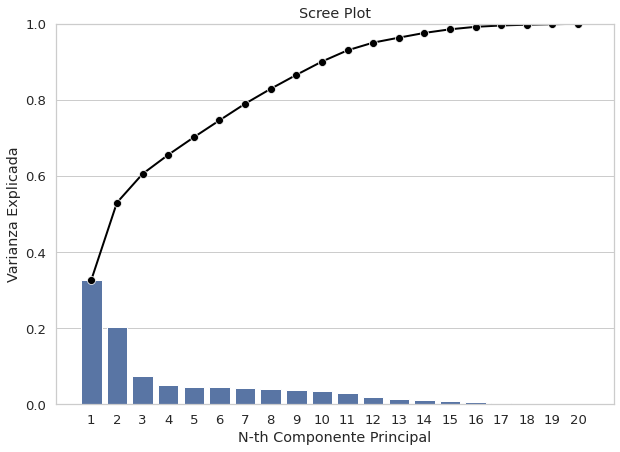

In [33]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

# Impresión magnitud de varianzas de cada varianza
_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )
# Línea de varianza acumulada
_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Componente Principal')
plt.ylabel('Varianza Explicada')
plt.ylim(0, 1)
plt.show()

## 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

In [31]:
import warnings
warnings.simplefilter('ignore')

## Heatmap

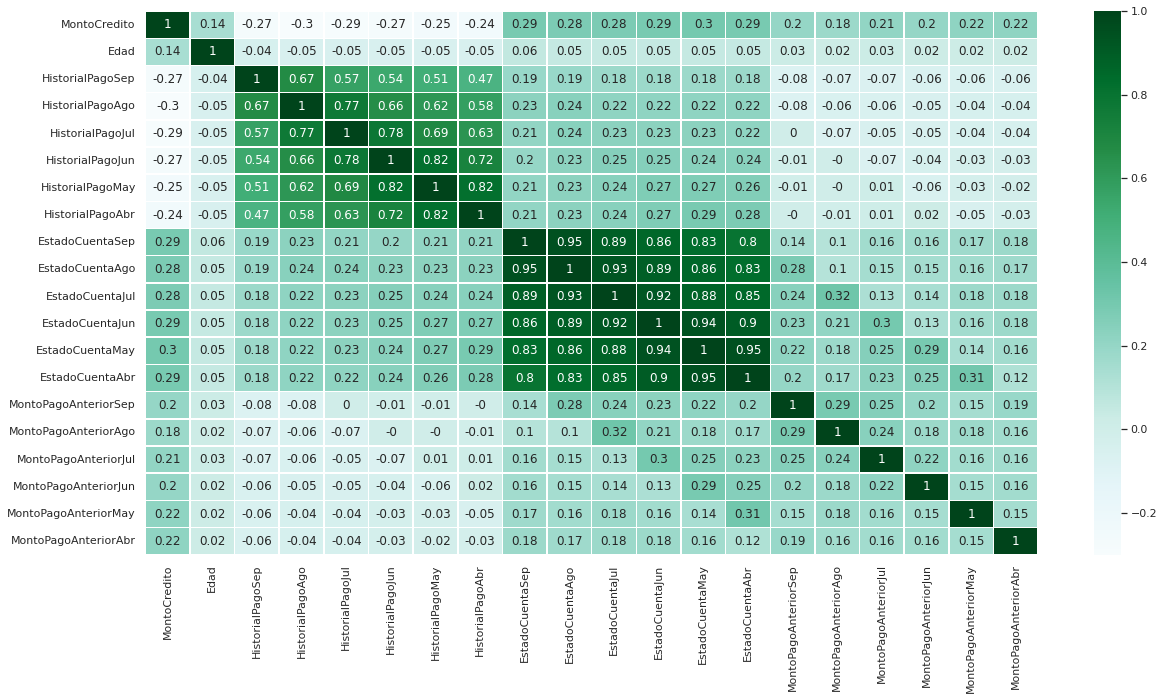

In [39]:
# Impresión de correlación de variables independientes
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df_X.corr(method='pearson').round(2), annot = True, linewidths=.5, cmap = 'BuGn')

## Box plot

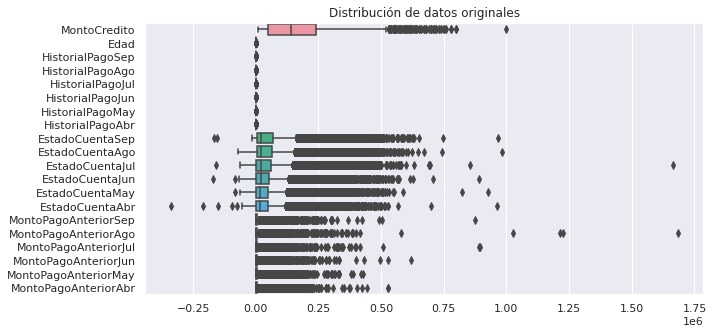

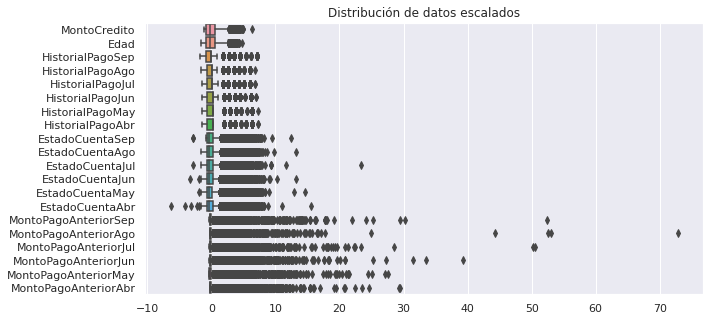

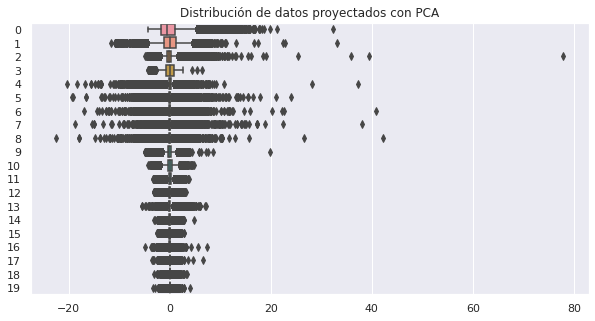

In [83]:
plt.rcParams["figure.figsize"] = (10,5)

# Distribución de los datos originales
ax0 = sns.boxplot(data = pd.DataFrame(df_X), orient="h")
ax0.set_title('Distribución de datos originales')
plt.show()


# Distribución de los datos antes de PCA (normalizados)
ax1 = sns.boxplot(data = pd.DataFrame(df_XScaler, columns = df_X.columns), orient="h")
ax1.set_title('Distribución de datos escalados')
plt.show()


# Distribución de los datos DESPUÉS de PCA (normalizados)
ax2 = sns.boxplot(data = pd.DataFrame(pcs.fit_transform(df_XScaler)), orient="h") # los datos seleccionados son la proyección de los datso originales por medio del objeto PCA creado previamente
ax2.set_title('Distribución de datos proyectados con PCA')
plt.show()

## Scatter plot

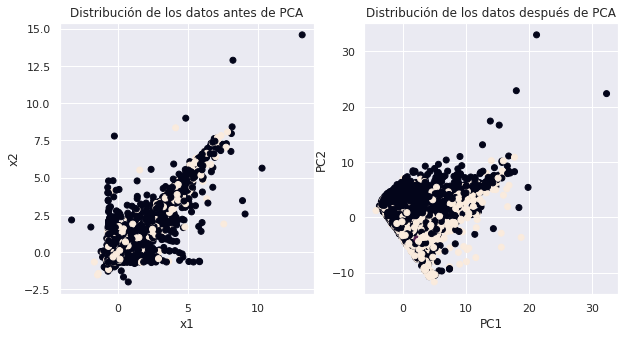

In [62]:
fig, axes = plt.subplots(1,2)

# Analizamos el comportamiento de las variables más importantes y su variabilidad antes de la transformación
axes[0].scatter(df_XScaler[:,11], df_XScaler[:,12], c=df_y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Distribución de los datos antes de PCA')


axes[1].scatter(pcs.fit_transform(df_XScaler)[:,0], pcs.fit_transform(df_XScaler)[:,1], c=df_y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Distribución de los datos después de PCA')
plt.show()

## Biplot

In [72]:
vars_mas_imp_pc1 = [9,10,11,12,13]
vars_mas_imp_pc2 = [0,3,4,5,6]
vars_mas_imp = vars_mas_imp_pc2 + vars_mas_imp_pc1

In [77]:
# Versión modificada de biplot para variables más importantes de PC1 y PC2
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in vars_mas_imp: # limitamos la cantidad de variables a mostrar a 5
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0]*50, coeff[i,1]*50, color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 55+i, coeff[i,1] * 55+i, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

Referencia de la función utilizada:

Loukas, Serafeim (2020) PCA clearly explained —When, Why, How to use it and feature importance: A guide in Python. Towards data Science. Obtenido de:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

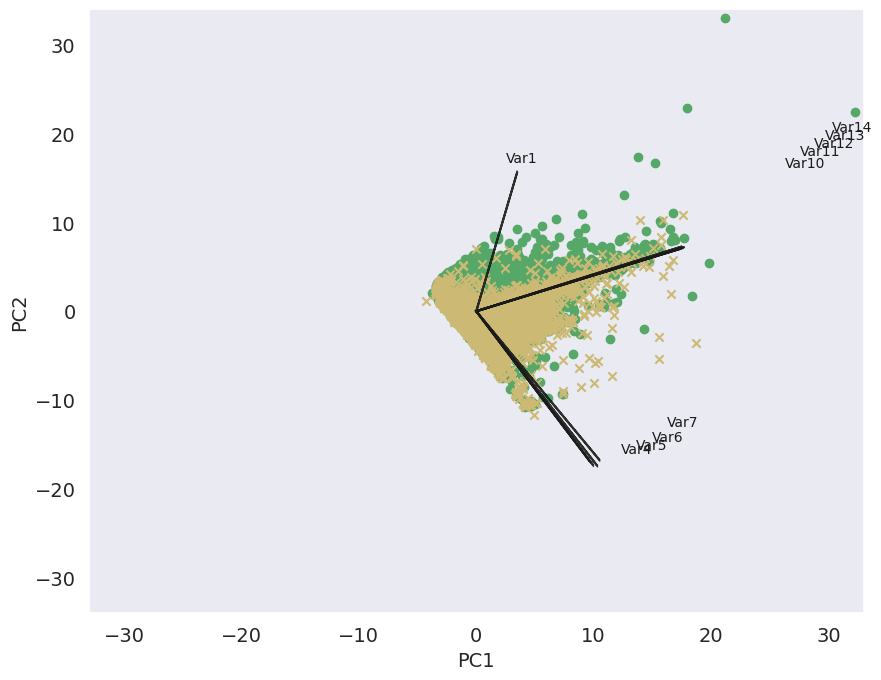

In [78]:
# Call the biplot function for only the first 2 PCs
biplot(pcs.fit_transform(df_XScaler)[:,0:2], np.transpose(pcs.components_[0:2, :]), df_y)
plt.show()

In [85]:
df_X.columns[vars_mas_imp_pc1]

Index(['EstadoCuentaAgo', 'EstadoCuentaJul', 'EstadoCuentaJun',
       'EstadoCuentaMay', 'EstadoCuentaAbr'],
      dtype='object')

In [86]:
df_X.columns[vars_mas_imp_pc2]

Index(['MontoCredito', 'HistorialPagoAgo', 'HistorialPagoJul',
       'HistorialPagoJun', 'HistorialPagoMay'],
      dtype='object')

## 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

Con base en lo analizado y después de realizar diferentes experimentos con cada uno de los gráficos mostrados se llegan a las siguientes observaciones.

Con respecto al mapa de calor presentado, se puede decir en primer lugar que este es un gráfico cuyo objetivo es la rápida visualización de correlación entre variables (en este caso sólo las variables predictoras). De esta manera nos permite visualizar rápidamente que existe una fuerte correlación entre los valores de Estado de cuenta e historial, la cual podría deberse a la relación cronológica que presentan, sin embargo, esto no descarta que sea una relación que pueda ser de utilidad. Este gráfico nos permite realizar una rápida observación de correlación de las variables que nos es de utilidad para determinar si es conveniente realizar una transformación (del conjunto de datos) de componentes principales. Para el presente caso dicha transformación es factible ya que, como se muestra, muchas de las variables involucradas están altamente correlacionadas.

Con respecto al conjunto de diagramas de caja generado, se pudo observar que estos nos permiten visualizar el efecto del escalamiento sobre el conjunto de datos. Adicionalmente se puede comparar el efecto de la distribución de los datos con las variables generadas (los datos proyectados en los nuevos componentes).
En primera instancia se puede observar cómo el escalamiento reduce en cierta medida el sesgo positivo a la derecha del conjunto de datos original al tiempo que genera una "compactación" de los outliers presentes. Por otra parte, es interesante observar cómo el PCA logar por completo centrar sus variables logrando una distribución normal de sus datos. Adicionalmente, se observa una variabilidad decreciente a medida que se muestran los componentes, mostrando el primer componente (correspondiente al valor de 0) mayor variabilidad y el último la menor.
Por lo tanto, este conjunto de gráficos brinda la utilidad de rápidamente observar el efecto de las transformaciones sobre los datos y de manera concisa asegurar que estas están teniendo el efecto deseado. A partir de su observación se puede llegar a la conclusión de que PCA logra contener la mayor parte de la variabilidad de los datos en la primera porción de sus componentes.

Con respecto al scatter plot presentado, se decidió imprimir la comparación de la presentación de los datos de las 2 variables más importantes (11 y 12, es decir, Estado de Cuenta de Junio y Mayo) y observar su "semejanza" en distribución con los componentes principales. A partir de lo mostrado se pudo observar que se logra mantener a grandes rasgos la distribución de la variabilidad de las variables seleccionadas, especialmente sobre el primer componente (algo esperado al ser las 2 variables más importantes para el mismo). Cabe destacar que esta distribución no es una copia perfecta ya que el conjunto de datos y por lo tanto, los componentes principales modifican su comportamiento por el efecto del resto de las variables. A pesar de esto, el gráfico nos permite visualizar que la transformación logra en cierta medida mantener la distribución original con menor cantidad de componentes.

Por último, con respecto al biplot adaptado, como es propio de su naturaleza, permite observar en primer lugar, cómo los valores proyectados se alinean adecuadamente con los ejes de los componentes. Por otra parte, permite observar la importancia de las variables originales sobre dichos componentes. Por ejemplo, en el gráfico adaptado se puede comprobar que las variables 9,10,11,12 y 13 (relacionadas con los EstdosdeCuenta de Abril a Agosto) son las más importantes para el primer componente mientras que las variables 0, 3,4,5 y 6 (relacionadas con el monto del crédito y los Historiales de Mayo a Agosto) lo son para el segundo componente.

Este gráfico nos permite observar qué tan bien se ajustan los datos a los 2 primeros componentes principales (que son a su vez los que contienen en sí la mayor parte de la variabilidad de los datos) al tiempo que muestra que tan alineadas están las variables originales con respecto a estos componentes, permitiéndonos de esta manera evaluar rápidamente si el desempeño de PCA es bueno o no y decidir si es conveniente aplicarlo o no.

En conclusión, los gráficos en cuestión nos permiten obtener una visión compacta y sistémica del conjunto de datos y los efectos que ciertas acciones tendrían sobre los mismos, lo cual permite con relativa facilidad dirigir acciones posteriores a partir del análisis exploratorio que éstos permiten.
